In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


Coefficients from sklearn: 
 [[1.98998113]]

Intercept from sklearn: 
 [0.55766131]

Coefficients from gradient descent algorithm: 
 1.8187433872896577

Intercept from gradient descent algorithm: 
 0.4713338677982628

number of iterations: 
 203


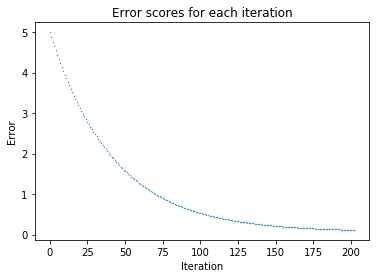

In [34]:
# Cost function for the linear rehression that we will try to optimize.
def LR_cost_function(alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coefficients that describe the fit line line, while 
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta*x[i]))**2
        error += point_error
    return error/n

#Function we will call each iteration (or step) of the gradient algorithm.
def step(alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        #partial derivative of the intercept.
        point_alpha = -(2/n)*(y[i] - (alpha_cur + beta_cur*x[i]))
        alpha += point_alpha
        
        #partial derivative of the slope
        point_beta = -(2/n)*x[i]*(y[i] - (alpha_cur + beta_cur*x[i]))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]        

#These constansts correpsond to the decision-points described above.
#how many steps to take
stop = 1000

#how far to move with each step
learning_rate = 0.005

#starting values for intercept and slope
alpha_start = 0
beta_start = 0

#time to make some data...
x = np.random.normal(0, 1, 100)
y = x*2 + np.random.sample(100)

#Fit a true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y.reshape(-1,1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)

# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

#storing each iteration to inspect later
all_error = []

#privide starting values
alpha = alpha_start
beta = beta_start

#run the algorithm
stop_value = True

iteration_count = 0

while stop_value == True:
    #take a step, assigning the results of our step function to feed into the next step
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    #Calculate the error
    error = LR_cost_function(alpha, beta, x, y)
    try:      
        if abs(all_error[-1] - error) < 0.001:
            stop_value = False
    except IndexError:
        pass
        
    #store the error to inspect later
    all_error.append(error)
    
    iteration_count += 1

    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

print('\nnumber of iterations: \n', iteration_count)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()